In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/DenseNet121_village_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 366 variables whereas the saved optimizer has 734 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [3]:
# Load the PlantVillage dataset from TFDS
dataset_name = "plant_village"
(ds_train, ds_test), ds_info = tfds.load(
    dataset_name, split=["train[:80%]", "train[80%:]"], as_supervised=True, with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.NFON2Z_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [4]:
# Get class names
class_names = ds_info.features["label"].names
num_classes = len(class_names)

In [5]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))   # Resize and normalize
    return image, label

In [6]:
# Apply preprocessing to test dataset
ds_test = ds_test.map(preprocess).batch(32)  # Batch size of 32

In [7]:
# Get true labels
y_true = np.concatenate([y.numpy() for _, y in ds_test], axis=0)

In [8]:
# Predict labels
y_pred_probs = model.predict(ds_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

340/340 ━━━━━━━━━━━━━━━━━━━━ 71s 122ms/step


In [9]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

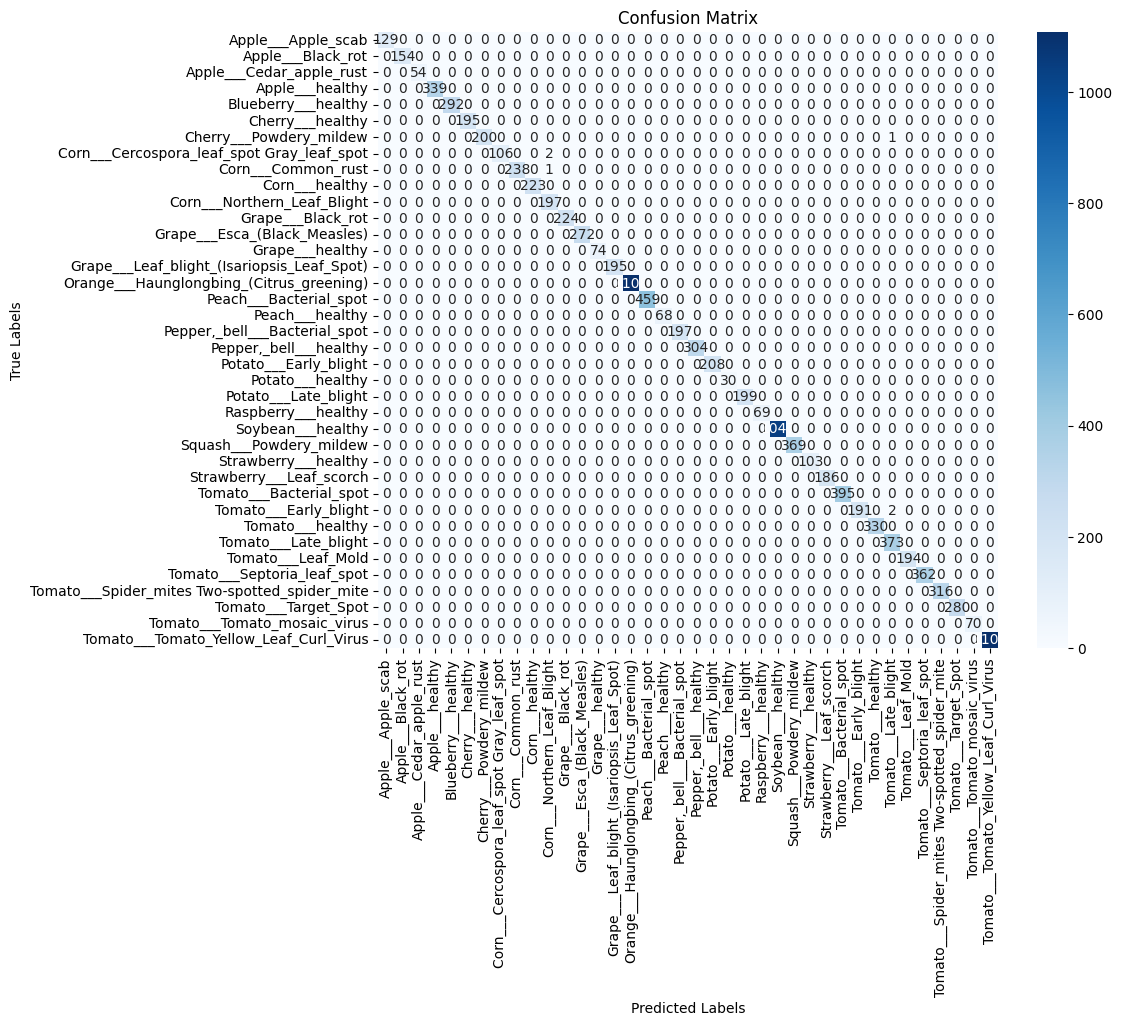

In [10]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Compute Precision, Recall, and F1-score
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
                                                precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      1.00      1.00       129
                            Apple___Black_rot       1.00      1.00      1.00       154
                     Apple___Cedar_apple_rust       1.00      1.00      1.00        54
                              Apple___healthy       1.00      1.00      1.00       339
                          Blueberry___healthy       1.00      1.00      1.00       292
                             Cherry___healthy       1.00      1.00      1.00       195
                      Cherry___Powdery_mildew       1.00      1.00      1.00       201
   Corn___Cercospora_leaf_spot Gray_leaf_spot       1.00      0.98      0.99       108
                           Corn___Common_rust       1.00      1.00      1.00       239
                               Corn___healthy       1.00      1.00      1.00       223
                  

In [12]:
k = model.evaluate(ds_test)
print(k)

340/340 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.9990 - loss: 0.0014
[0.0007042132783681154, 0.9994475841522217]


In [14]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.9990 - loss: 0.0014
Test Accuracy: 99.94%
